# Sources of uncertainty
<img src="imgs/sources_uncertainty.jpg" style="inline: center; width: 80%;">

Fig. 1. Schematic illustration of the most important sources of uncertainty in environmental systems modeling, including (1) parameter, (2) input data (also called forcing or boundary conditions), (3), initial state, (4) model structural, (5) output, and (6) calibration data uncertainty. The measurement data error is often conveniently assumed to be known, a rather optimistic approach in most practical situations. Question remains how to describe/infer properly all sources of uncertainty in a coherent and statistically adequate manner [(Vrugt, J.A., 2016)](https://doi.org/10.1016/j.envsoft.2015.08.013).

$$\tilde{Y}\leftarrow \mathbb{R}(X^*)+\varepsilon$$

$$\tilde{Y}\leftarrow \mathbb{swatmf}(X^*,\tilde{U}, \tilde{\psi}_0 )+E$$


# Bayes' Theorem
> ### _"When the facts change, I change my mind. What do you do, sir?"_
> --John Maynard Keynes

Loosely, Bayes' Theorem can be interpeted as 

$$P\left(\boldsymbol{\theta}|\textbf{d}\right)=\frac{P\left(\textbf{d}|\boldsymbol{\theta}\right) P\left (\boldsymbol{\theta}\right)}{P\left(\textbf{d}\right)}$$
 
in which $\boldsymbol{\theta}$ are parameters and $\mathbf{d}$ are the data.

This is really just rearranging the law of conditional probabilities:

$$P\left(\boldsymbol{\theta}|\textbf{d}\right)P\left(\textbf{d}\right)=P\left(\textbf{d}|\boldsymbol{\theta}\right) P\left(\boldsymbol{\theta}\right)$$

_Um, what?_ Let's use pictures to make this easier to understand.

## A Venn diagram to explore conditional probabilities
<img src="imgs/conditional_probability.png" style="inline: left; width: 50%" >

By [Gnathan87 - Own work, CC0](https://commons.wikimedia.org/w/index.php?curid=15991401)


What is the probability of $A$ if we know we are in $B_1$? The equation for this is:

$$P\left(A|B_1\right)$$

It is easy to see that it is 100% or:

$$P\left(A|B_1\right)=1.0$$

Why? Because the $B_1$ circle is entirely within the $A$ circle. Therefore, if we know we are in $B_1$, then we must also be in $A$.

As a general rule, we can state 
$$P\left(A|B_1\right)=\frac{P\left(A\cap B_1\right)}{P\left(B_1\right)}$$

or, equivalently 
$$P\left(A\cap B_1\right)=P\left(A|B_1\right)P\left(B_1\right)$$

So what about $P\left(A|B_2\right)$?

$$P\left(A|B_2\right)=\frac{P\left(A\cap B_2\right)}{P\left(B_2\right)}=\frac{0.12}{0.12+0.04}=0.75$$

### Bayes Theorem

Now we can derive Bayes' theorem because joint probabilities are symmetrical. Switching notation to 
$\boldsymbol{\theta} \text{ and }\mathbf{d}$:

$$P\left(\boldsymbol{\theta}\cap \mathbf{d}\right)=P\left(\mathbf{d}\cap \boldsymbol{\theta}\right)$$

$$P\left(\boldsymbol{\theta}|\textbf{d}\right) P\left(\textbf{d}\right) = P\left(\textbf{d}|\boldsymbol{\theta}\right) P\left(\boldsymbol{\theta}\right)$$

With the tiniest little algebra, we get Bayes' theorem -- #boom#!

$$P\left(\boldsymbol{\theta}|\textbf{d}\right) = \frac{P\left(\textbf{d}|\boldsymbol{\theta}\right) P\left(\boldsymbol{\theta}\right)}{P\left(\textbf{d}\right)}$$


# So, what does this really mean?  

## A practical example

Let's play with a concrete example, one hinging on life, death, trust, and promises kept!
<img src="imgs/garden.png" style="inline: left; width: 100%">

My wife and kids garden Korean vegetable sesame leaves, lettuce, chili and watermelon.
And they were going away to Korea for two months the last summer. Back then, If the vegetables got watered, their probability of dying was 10%. They are 80% likely to die if they don't get watered. So my wife and kids asked me to water them; they were 75% certain I would do it.

We can express this all in terms of probabilities and conditional probabilities.

### First a couple definitions:

$\theta_w$: I water the garden.

$\theta_{nw}$: I forget to water the garden.

$d_a$: the garden is alive when they return 

$d_d$: the vegetables are dead when they return



$\mathbf{d} = [d_a,d_d]$: a vector of all possible outcomes
 
$\boldsymbol{\theta} = [\theta_w,\theta_{nw}]$: a vector of all possible outcomes

Let's express what we know in probability equations:
$$P\left(d_d | \theta_w\right)=0.10$$
$$P\left(d_d | \theta_{nw}\right)=0.8$$
$$P\left(\theta_w\right)=0.75$$
$$P\left(\theta_{nw}\right)=0.25$$

And we can assign these as python variables to get our maths groove on:

In [2]:
PDd_thw = 0.1
PDd_thnw = 0.8
Prior_thw = 0.75
Prior_thnw = 0.25

Now we can ask questions like, "what is the probability the vagetable is dead?"

To calculate, we add up all the conditional probablities like this:

$$P\left(d_d\right) = P\left(d_d\cap\theta_w\right) + P\left(d_d\cap\theta_{nw}\right)$$

$$P\left(d_d\right) = P\left(d_d|\theta_w\right)P\left(\theta_w\right) + P\left(d_d|\theta_{nw}\right)P\left(\theta_{nw}\right)$$

In [3]:
PDd = PDd_thw*Prior_thw + PDd_thnw*Prior_thnw
print ('Probability vegetable is dead = {0:.3f}'.format(PDd))


Probability vegetable is dead = 0.275


Since we only have two discrete outcomes, the probability of the vegetable being alive is simply 

$$P\left(d_a\right)=1-P\left(d_d\right)$$


In [4]:
PDa = 1-PDd
print ('Probability vegetable is alive = {0:.3f}'.format(PDa))

Probability vegetable is alive = 0.725


Great! So we can incorporate all the possible arrangements of events to determine likely outcomes. But....what we are _really_ interested in is what we learn with partial information. This is where household harmony can be made or broken!

## Learning from information

They come home and see that the vegetable is dead (crumbs!). Who to blame? What is the probability that I forgot to water it? 

Mathematically, this is;
$$P\left(\theta_{nw} | d_d\right)$$

We can use Bayes' theorem to evaluate this new information (e.g. we have observed that the plant is dead)

$$P\left(\theta_{nw} | d_d\right) = \frac{P\left(d_d | \theta_{nw}\right) P\left(\theta_{nw}\right)}{P\left(d_d\right)}$$

In [5]:
PthnwDd = PDd_thnw * Prior_thnw/ PDd
print ("Probability that I failed to water the vegetable")
print("having seen it's dead is {0:.3f}".format(PthnwDd))

Probability that I failed to water the vegetable
having seen it's dead is 0.727


Alternatively, we can see the converse: How likely did I water the plant given that it's alive?

$$P\left(\theta_w | d_a\right) = \frac{P\left(d_a | \theta_w\right) P\left(\theta_w\right)}{P\left(d_a\right)}$$

In [6]:
PthwDa = (1-PDd_thw) * Prior_thw/ PDa
print ("Probability that I did water the plant")
print ("having seen it's alive is {0:.3f}".format(PthwDa))

Probability that I did water the plant
having seen it's alive is 0.931


How to update our prior probability or trust?
<img src="imgs/prior_confidence.jpg" style="inline: left; width: 50%">

### Continuous variables

Right then, but we are in the world of continuous variables, not simple discrete probabilities

This means that we end up with probability density functions rather than discrete probabilities and the denominator on the RHS gets tricky to evaluate (the total probability). Luckily, we are mostly conncerned with finding the parameters that maximize the probability and less concerned with the probability itself.

<img src="imgs/Fig10.3_Bayes_figure.png" style="inline: left; width: 75%; margin-right: 1%; margin-bottom: 0.5em;">


This is a learning framework, where what we know at the end is a function of what we started with and what we _learned_ through a new experiment (model) or new information

$$\underbrace{P(\boldsymbol{\theta}|\textbf{d})}_{\substack{\text{posterior} \\ \text{pdf}}} \propto \underbrace{\mathcal{L}( \boldsymbol{\theta}| \textbf{d})}_{\substack{\text{likelihood} \\ \text{function}}} \underbrace{P(\boldsymbol{\theta})}_{\substack{\text{prior } \\ \text{pdf}}} $$


$$\underbrace{P(\boldsymbol{\theta}|\textbf{d})}_{\substack{\text{what we} \\ \text{know now}}} \propto \underbrace{\mathcal{L}(\boldsymbol{\theta} | \textbf{d})}_{\substack{\text{what we} \\ \text{learned}}} \underbrace{P(\boldsymbol{\theta})}_{\substack{\text{what we} \\ \text{knew}}} $$


In [7]:
import bayes_helper as bh
from ipywidgets import interact
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

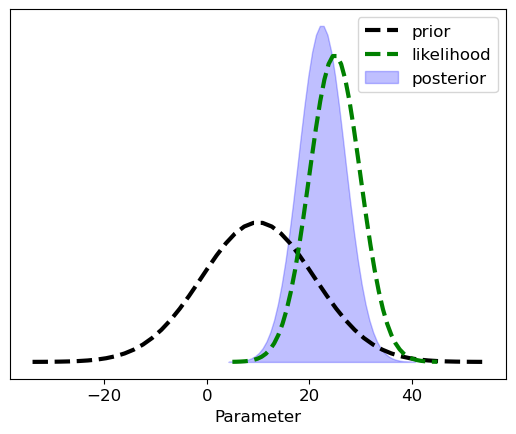

In [8]:
bh.plot_posterior(prior_mean=10, prior_std=11, likeli_mean = 25, likeli_std=5);

In [9]:
interact(bh.plot_posterior,
         prior_mean=(1, 20., .5), likeli_mean=(1, 20, 1), 
         prior_std=(.1, 8, .1), likeli_std=(.1, 8, 2));

interactive(children=(FloatSlider(value=10.5, description='prior_mean', max=20.0, min=1.0, step=0.5), FloatSli…

# The mandatory "coin-flipping example" 
> _Borrowed from **Bayesian Methods for Hackers**. The full Github repository is available [here](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers)_

We can start with an "ignorance" prior - equal probabilities of all outcomes (both, in the case---heads and tails). By flipping a coin we can observe outcomes, constantly updating and learning from each experiment.

In [10]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
plt.rcParams["animation.html"] = "jshtml"

In [11]:
dist = stats.beta
max_trials = 1000
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 30, 50, 70, 100, 200, 500, max_trials]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
def animate(i):
    N = n_trials[i]
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    ax.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    ax.fill_between(x, 0, y, color="#348ABD", alpha=0.3)
    ax.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)
    ax.set_xlim(0, 1)
    ax.set_yticklabels([])
    ax.autoscale(tight=True)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[-1:], labels[-1:])
    return
plt.suptitle("Bayesian updating of posterior probabilities",
             y=0.98,
             fontsize=14)
ani = animation.FuncAnimation(fig, animate, frames=len(n_trials), interval=1000)
plt.close()

In [12]:
ani

The posterior probabilities are represented by the curves, and our uncertainty is proportional to the width of the curve. As the plot above shows, as we start to observe data our posterior probabilities start to shift and move around. Eventually, as we observe more and more data (coin-flips), our probabilities will tighten closer and closer around the true value of $p=0.5$ (marked by a dashed line). 

Notice that the plots are not always *peaked* at 0.5. There is no reason it should be: recall we assumed we did not have a prior opinion of what $p$ is. In fact, if we observe quite extreme data, say 8 flips and only 1 observed heads, our distribution would look very biased *away* from lumping around 0.5 (with no prior opinion, how confident would you feel betting on a fair coin after observing 8 tails and 1 head). As more data accumulate, we would see more and more probability being assigned at $p=0.5$, though never all of it.